In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from gensim import corpora, models
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dimi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data_path = './Data/mlops_2022.csv'

In [4]:
def read_data(filename):
    return pd.read_csv(filename)

In [5]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]

In [6]:
def calculate_word_frequency(processed_titles):
    all_words = [word for words in processed_titles for word in words]
    return pd.Series(all_words).value_counts()


In [7]:
def plot_top_titles(data):
    top_titles = data['project_title'].value_counts()[:10]
    plt.figure(figsize=(10, 8))
    top_titles.plot(kind='barh', color='darkseagreen', edgecolor='black')
    plt.title('Top 10 Most Frequent Project Titles')
    plt.xlabel('Frequency')
    plt.ylabel('Project Titles')
    plt.gca().invert_yaxis()
    plt.show()

In [8]:
def plot_word_frequency(word_freq):
    print("Top 20 Most Frequent Words:")
    print(word_freq[:20])
    plt.figure(figsize=(10, 8))
    word_freq[:20].plot(kind='bar', color='darkseagreen', edgecolor='black')
    plt.title('Top 20 Most Frequent Words in Project Titles')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
def generate_wordcloud(processed_titles):
    all_words2 = ' '.join([' '.join(words) for words in processed_titles])
    wordcloud = WordCloud(width = 1000, height = 500).generate(all_words2)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [10]:

def perform_topic_modeling(processed_titles):
    dictionary = corpora.Dictionary(processed_titles)
    corpus = [dictionary.doc2bow(text) for text in processed_titles]
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
    topics = lda_model.print_topics(num_words=5)
    for topic in topics:
        print(topic)


In [11]:
def perform_analysis(filename):
    data = read_data(filename)
    data['processed_titles'] = data['project_title'].apply(preprocess_text)
    word_freq = calculate_word_frequency(data['processed_titles'])
    plot_top_titles(data)
    plot_word_frequency(word_freq)
    generate_wordcloud(data['processed_titles'])
    perform_topic_modeling(data['processed_titles'])

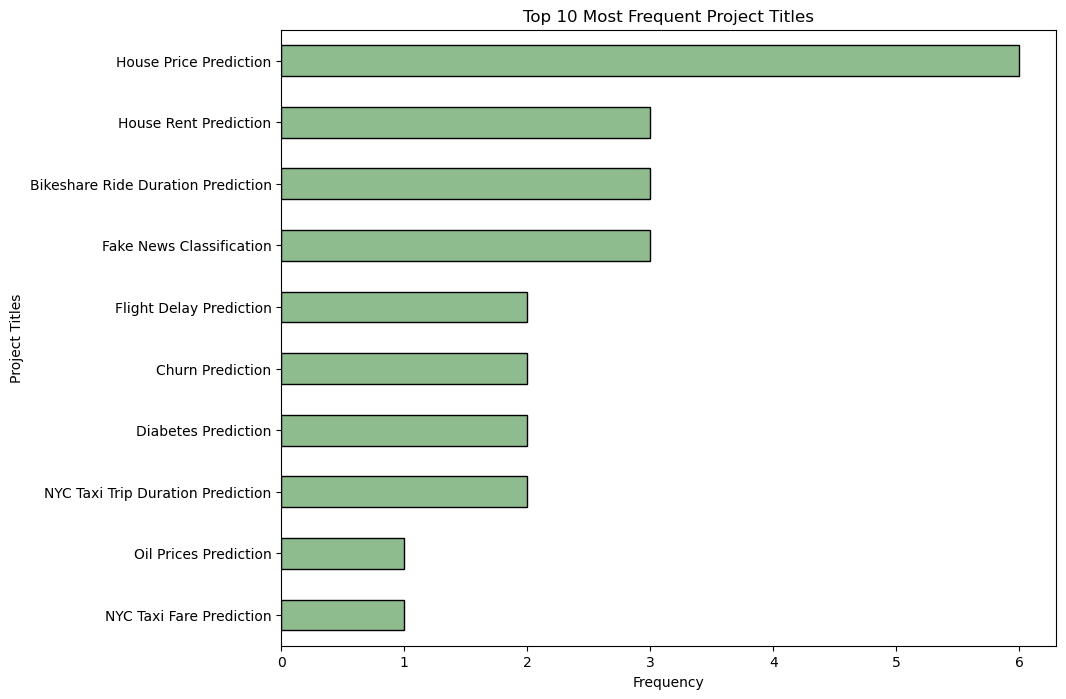

Top 20 Most Frequent Words:
prediction        53
price             15
classification    12
house              9
duration           7
bikeshare          5
car                5
taxi               5
nyc                5
analysis           5
churn              4
quality            4
customer           4
ride               4
wine               3
rent               3
fake               3
trip               3
news               3
flight             3
dtype: int64


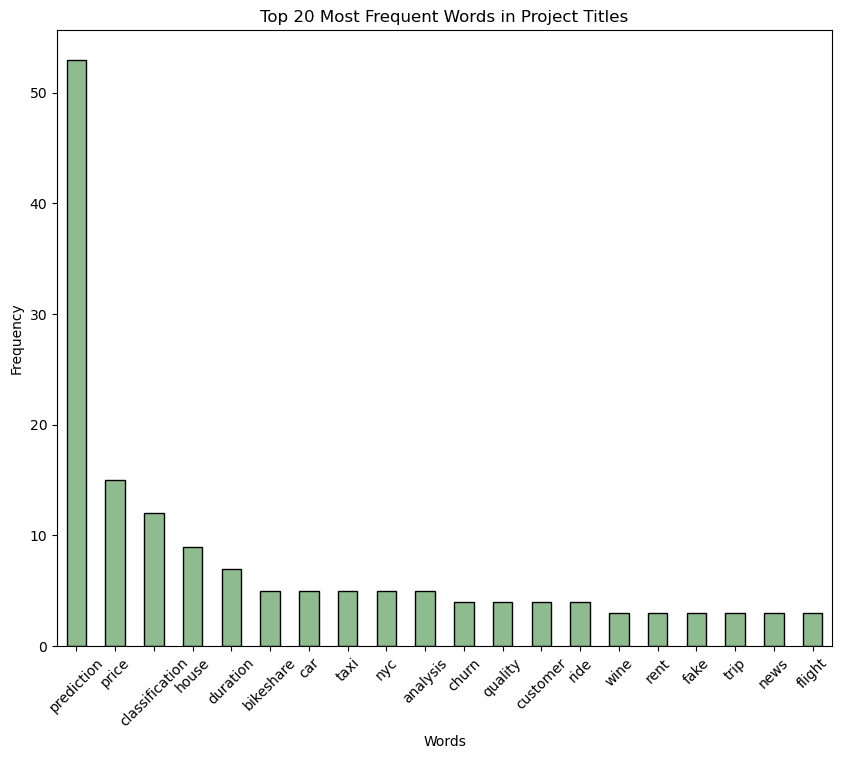

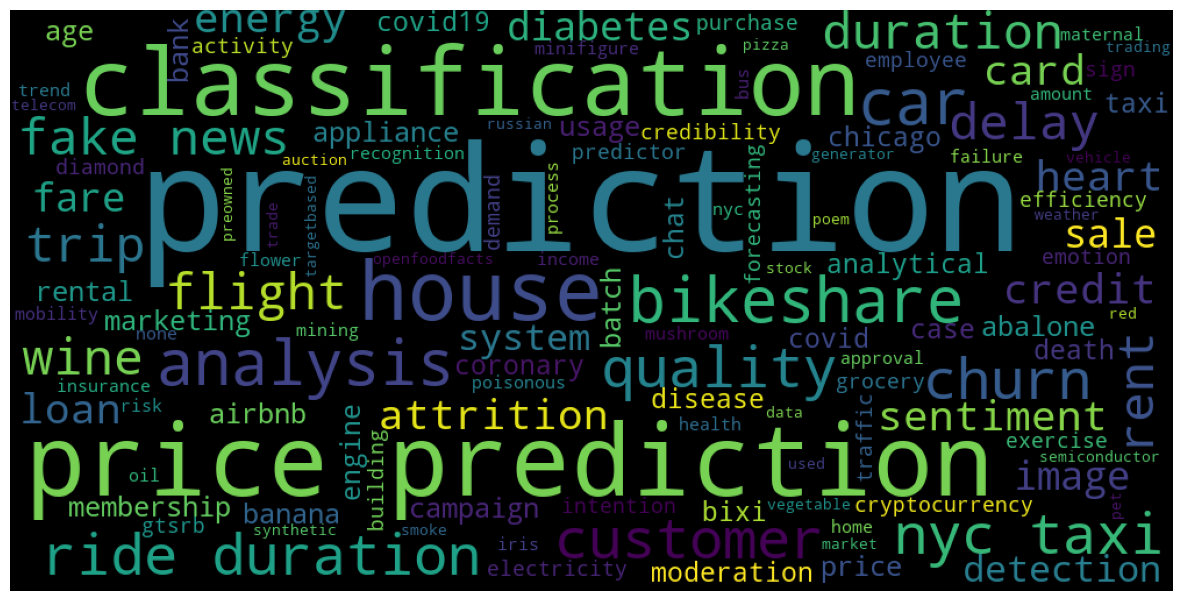

(0, '0.178*"prediction" + 0.048*"taxi" + 0.048*"nyc" + 0.048*"price" + 0.030*"quality"')
(1, '0.139*"classification" + 0.041*"news" + 0.041*"fake" + 0.038*"analysis" + 0.028*"heart"')
(2, '0.061*"prediction" + 0.041*"image" + 0.031*"classification" + 0.022*"bikeshare" + 0.022*"detection"')
(3, '0.221*"prediction" + 0.094*"price" + 0.057*"house" + 0.039*"duration" + 0.039*"ride"')
(4, '0.155*"prediction" + 0.069*"house" + 0.069*"rent" + 0.046*"loan" + 0.026*"car"')


In [12]:
perform_analysis(data_path)

From the word frequency analysis, we found that "prediction" is the most commonly used word in the project titles, followed by "price" and "classification". This suggests that a significant number of projects involve prediction tasks, such as predicting prices or performing some kind of classification.

Words like "house", "bikeshare", "taxi", and "nyc" imply that several projects might be related to housing prices, bike sharing systems, taxi services, and perhaps data specific to New York City. The presence of words like "duration", "ride", "trip", "flight", and "delay" suggest a focus on transportation and travel-related projects. Words like "churn", "customer", "car", and "quality" hint at projects related to customer retention ("churn"), automobile industry ("car"), and perhaps quality control or quality prediction ("quality").